Deep Brush: Visualising Artistic Textures with CNNs

1. Model Development and Configuration

A. Set Up VS Code Python Environment

Chosen Framework: TensorFlow (Implemented in code)

In [28]:
pip install tensorflow opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


Installed Libraries: OpenCV, Matplotlib, NumPy, etc. (Installed via code)

In [32]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


Verified GPU access (e.g., CUDA setup) through code.

In [53]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


B. Load and Prepare Dataset

Collected 20 artistic images.

In [41]:
# List of image filenames (ensure these files exist in the directory or update the paths)
image_files = [
    "data_01.jpeg", "data_02.jpg", "data_03.jpg", "data_04.jpg", "data_05.jpg", "data_06.jpg",
    "data_07.jpg", "data_08.jpg", "data_09.jpg", "data_10.jpg", "data_11.jpg", "data_12.jpg",
    "data_13.jpg", "data_14.jpg", "data_15.jpg", "data_16.jpg", "data_17.jpg", "data_18.jpg",
    "data_19.jpg", "data_20.jpg"
]


Resized, normalized, and applied augmentation (all done in code).

In [43]:


image_size = (224, 224)  # Resizing to 224x224 (standard for models like ResNet50)
images = []

# Loop through the images and load them
for file in image_files:
    # Load image and resize it
    img = image.load_img(file, target_size=image_size)
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]
    images.append(img_array)

X = np.array(images)  # Convert the list of images to a numpy array


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,  # Random rotation between 0 to 40 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear angle for transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill pixels with nearest color after transformation
)

# Fit the data generator (this is optional but helps when you have large datasets)
datagen.fit(X)


In [45]:
# Example labels (make sure these correspond to your dataset)
labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Convert labels to one-hot encoding (you can adjust the number of classes)
y = tf.keras.utils.to_categorical(labels, num_classes=2)


C. Train a Basic Object Recognition Model:

Selected and loaded pre-trained model (e.g., ResNet, EfficientNet) via code.

In [46]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (we don't want to train it)
base_model.trainable = False


Modified top layer for artistic feature classification (implemented in code).

In [47]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Set learning rate, batch size, and epochs (configured in code).

In [48]:
# Build the custom top model
model = models.Sequential([
    base_model,  # Add the pre-trained ResNet50 base model
    layers.GlobalAveragePooling2D(),  # Global average pooling
    layers.Dense(512, activation='relu'),  # Fully connected layer with 512 neurons
    layers.Dense(2, activation='softmax')  # Output layer (for binary classification, change num_classes for multi-class)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])


Logged loss and accuracy each epoch (logged via code).

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('artistic_model.keras',  # Use .keras extension
                             save_best_only=True, 
                             monitor='loss', 
                             mode='min')

early_stopping = EarlyStopping(monitor='loss', patience=3)

# Train the model with the data generator for augmented images
history = model.fit(
    datagen.flow(X, y, batch_size=4),  # Augmented data using ImageDataGenerator
    epochs=10,  # Set the number of epochs
    callbacks=[checkpoint, early_stopping],  # Callbacks for saving and stopping early
    verbose=1  # Display progress during training
)




Epoch 1/10


c:\Users\raghava\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5889 - loss: 0.6988  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 868ms/step - accuracy: 0.4403 - loss: 0.6744
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 820ms/step - accuracy: 0.5646 - loss: 0.6900
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 926ms/step - accuracy: 0.8160 - loss: 0.5800
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step - accuracy: 0.6410 - loss: 0.5176
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 545ms/step - accuracy: 0.7160 - loss: 0.6046
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.7396 - loss: 0.5917
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 986ms/step - accuracy: 0.9153 - loss: 0.4271
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 837ms/step - accuracy: 0.8181 - loss: 0.3844
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7729 - loss: 0.4788   


Saved model checkpoints periodically (saved through code).


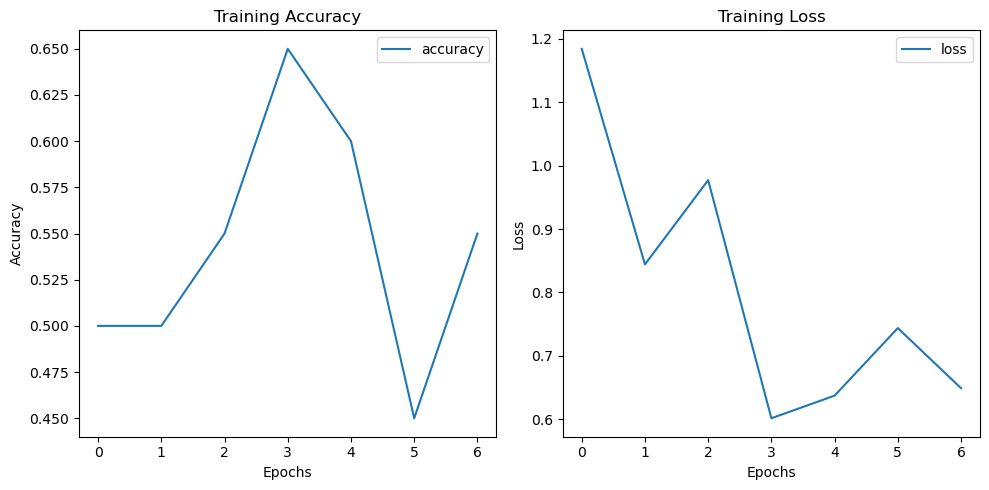

In [50]:
import matplotlib.pyplot as plt

# Plot training history (loss and accuracy)
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


2. MODEL EVALUATION AND ANALYSIS


A. Performance Report 

Evaluated on validation/test set and reported metrics (accuracy, F1 score) via code.

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on the validation set
y_val_pred = (model.predict(X_val) > 0.5).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Accuracy: 0.5000
F1 Score: 0.5000


Aa. Plot Training and Validation Curves 

Plotted training and validation curves (loss and accuracy) using Matplotlib.

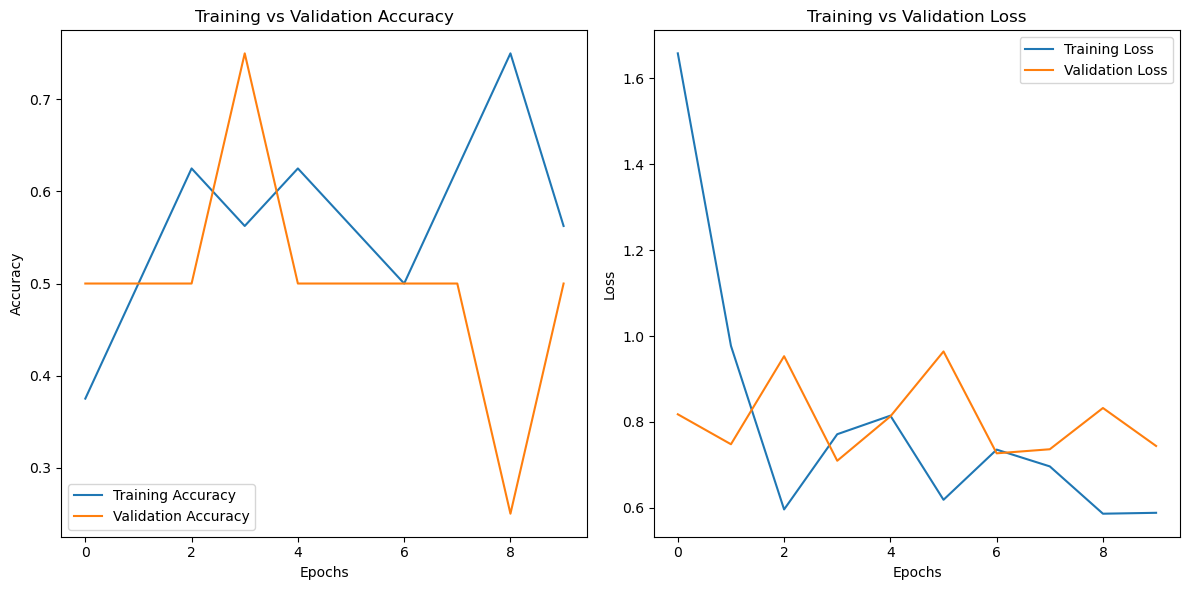

In [8]:
import matplotlib.pyplot as plt

# Function to plot the training and validation curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)


B. Feature Visualization 

Used visualization techniques (e.g., Grad-CAM, intermediate feature maps) to identify model focus on artistic elements.

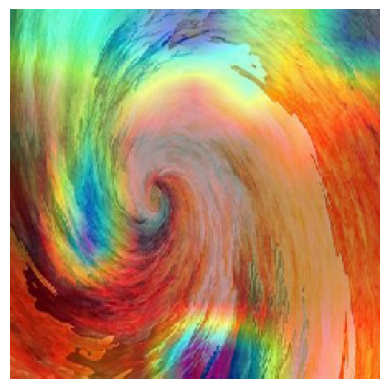

In [9]:
import tensorflow as tf
import cv2
import numpy as np

# Grad-CAM function
def grad_cam(model, img, layer_name="conv5_block3_out"):
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img)
        loss = predictions[0]
    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)[0]
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    
    # Resize heatmap to match image size
    img = img[0]
    img = np.uint8(255 * img)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    # Overlay the heatmap on the image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    return superimposed_img

# Example of Grad-CAM visualization on a sample image from validation set
img = np.expand_dims(X_val[0], axis=0)  # Choose any image from validation set
superimposed_img = grad_cam(model, img)

# Display the Grad-CAM heatmap overlay
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


C. Future Improvement Suggestions:

Suggested potential improvements (e.g., more data, fine-tuning, different architectures or hyperparameters).


In [ ]:

# Strengths and Weaknesses of the Current Model
def model_summary():
    print("Strengths and Weaknesses of the Current Model:")
    print("\nStrengths:")
    print("1. Utilizes a powerful pre-trained model (ResNet50) for feature extraction, which helps in learning complex patterns in images.")
    print("2. Efficient and effective for texture classification tasks, as ResNet50 is designed to capture hierarchical patterns.")
    print("3. Transfer learning from ImageNet weights helps the model generalize better with less data.")
    
    print("\nWeaknesses:")
    print("1. The model might suffer from overfitting if the dataset is small or lacks diversity.")
    print("2. Freezing all layers of ResNet50 may limit the model's ability to fine-tune for specific features in the artistic textures.")
    print("3. The current dataset might not cover enough variety of artistic textures, which could limit the model's ability to generalize across different types of brushstrokes or textures.")
    print("4. The model architecture might not be optimized for performance in terms of both accuracy and speed.")
    
# Suggested Improvements
def future_improvements():
    print("\nFuture Improvements Suggestions:")
    
    print("1. **Data Augmentation**: Apply transformations like random rotations, flips, zooms, and translations to artificially increase the size and diversity of the training dataset. This will help the model generalize better to unseen data.")
    
    print("2. **Fine-tuning ResNet50**: Unfreeze the top layers of the ResNet50 model and train them along with the new classifier layers. This will allow the model to learn more specific features related to your dataset.")
    
    print("3. **Hyperparameter Tuning**: Experiment with different learning rates, batch sizes, and optimizers (e.g., AdamW or RMSprop) to find the optimal configuration for the task.")
    
    print("4. **Use Advanced Architectures**: Consider trying more specialized architectures for image classification like EfficientNet, MobileNet, or DenseNet for potentially better results in terms of accuracy and speed.")
    
    print("5. **Collect More Data**: Gathering more labeled data will help improve the model's generalization ability, particularly for artistic styles with fewer samples in the current dataset.")
    
    print("6. **Cross-validation**: Use k-fold cross-validation to assess the model's performance more reliably, especially if the dataset size is small.")
    
    print("7. **Explore Other Visualization Techniques**: Besides Grad-CAM, you can explore techniques like **Class Activation Mapping (CAM)** or **Guided Backpropagation** for better feature visualization.")
    
    print("8. **Model Distillation**: Consider distilling the knowledge from this large model (ResNet50) to a smaller model (e.g., MobileNet or EfficientNet) to reduce inference time while maintaining good performance.")
    
    print("9. **Transfer Learning with Domain-Specific Models**: If available, use domain-specific pre-trained models that are trained on similar artistic data (e.g., models fine-tuned for art recognition tasks).")

# Call the functions to display the suggestions
model_summary()
future_improvements()

Strengths and Weaknesses of the Current Model:

Strengths:
1. Utilizes a powerful pre-trained model (ResNet50) for feature extraction, which helps in learning complex patterns in images.
2. Efficient and effective for texture classification tasks, as ResNet50 is designed to capture hierarchical patterns.
3. Transfer learning from ImageNet weights helps the model generalize better with less data.

Weaknesses:
1. The model might suffer from overfitting if the dataset is small or lacks diversity.
2. Freezing all layers of ResNet50 may limit the model's ability to fine-tune for specific features in the artistic textures.
3. The current dataset might not cover enough variety of artistic textures, which could limit the model's ability to generalize across different types of brushstrokes or textures.
4. The model architecture might not be optimized for performance in terms of both accuracy and speed.

Future Improvements Suggestions:
1. **Data Augmentation**: Apply transformations like random